In [1]:
import datetime
import json
import os
import pytz

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm.auto import tqdm

### Question 9.1
Report the following statistics for each hashtag, i.e. each file has: 
- Average number of tweets per hour
- Average number of followers of users posting the tweets per tweet (to make it simple, we average over the number of tweets; if a users posted twice, we count the user and the user’s followers twice as well)
- Average number of retweets per tweet

In [2]:
def read_file(filename: str):
    data_dir = "/tmp2/kch/ece219/ECE219_tweet_data"
    data = []
    n = 100

    with open(os.path.join(data_dir, filename)) as f:
        for line in tqdm(f):
            all_info = json.loads(line)
            taken_info = {
                "type": all_info["type"],
                "title": all_info["title"],
                "text": all_info["tweet"]["text"],
                "id": all_info["tweet"]["id"],
                "hashtags": [
                    h["text"].lower() for h in all_info["tweet"]["entities"]["hashtags"]
                ],
                "retweet_count": all_info["tweet"]["retweet_count"],
                "author_followers": all_info["author"]["followers"],
                "original_author_followers": all_info["original_author"]["followers"],
                "citation_date": all_info["citation_date"],
                "ranking_score": all_info["metrics"]["ranking_score"],
                "citations": all_info["metrics"]["citations"]["total"],
                "impressions": all_info["metrics"]["impressions"],
            }
            data.append(taken_info)
    #         if len(data) == n:
    #             break

    data_df = pd.DataFrame(data)
    return data_df
    
def get_filepaths(rootdir: str):
    res = []
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            filepath = subdir + os.sep + file
            if filepath.endswith(".txt"):
                res.append(filepath)
    return res
    
def file_statistics(df: str):
    pst_tz = pytz.timezone('America/Los_Angeles')
    df['citation_date_datetime'] = df['citation_date'].apply(datetime.datetime.fromtimestamp, args=(pst_tz,))
    max_citation_date = max(df['citation_date_datetime'])
    min_citation_date = min(df['citation_date_datetime'])
    
    avg_tweets_per_hour = len(df) / ((max_citation_date - min_citation_date).total_seconds() / 60 / 60)
    avg_followers_posting_tweets = df['citations'].sum() / len(df)
    avg_retweet_per_tweet = df['author_followers'].sum() / len(df)

    print(f'Average tweets per hour: {avg_tweets_per_hour}')    
    print(f'Average number of users posting tweets per tweet: {avg_followers_posting_tweets}')
    print(f'Average number of retweet per tweet: {avg_retweet_per_tweet}')

In [3]:
rootdir = "/tmp2/kch/ece219/ECE219_tweet_data"
dataset = {}

filepaths = get_filepaths(rootdir)
dataset_dict = {filepath: read_file(filepath) for filepath in filepaths}

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [4]:
for filepath in filepaths:
    print(filepath)
    file_statistics(dataset_dict[filepath])
    print()

/tmp2/kch/ece219/ECE219_tweet_data/tweets_#superbowl.txt
Average tweets per hour: 2072.1184017040796
Average number of users posting tweets per tweet: 2.3911895819207736
Average number of retweet per tweet: 8814.96799424623

/tmp2/kch/ece219/ECE219_tweet_data/tweets_#sb49.txt
Average tweets per hour: 1276.8570598680474
Average number of users posting tweets per tweet: 2.52713444111402
Average number of retweet per tweet: 10374.160292019487

/tmp2/kch/ece219/ECE219_tweet_data/tweets_#gohawks.txt
Average tweets per hour: 292.48785062173687
Average number of users posting tweets per tweet: 2.0132093991319877
Average number of retweet per tweet: 2217.9237355281984

/tmp2/kch/ece219/ECE219_tweet_data/tweets_#nfl.txt
Average tweets per hour: 397.0213901819841
Average number of users posting tweets per tweet: 1.5344602655543254
Average number of retweet per tweet: 4662.37544523693

/tmp2/kch/ece219/ECE219_tweet_data/tweets_#gopatriots.txt
Average tweets per hour: 40.95469800606194
Average num

### Question 9.2
Plot “number of tweets in hour” over time for #SuperBowl and #NFL (a bar plot with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named as tweet [#hashtag].txt. 

In [5]:
def tweets_per_hour(df: pd.DataFrame):
    return df[['title']].groupby([df['citation_date_datetime'].dt.date, 
                                  df['citation_date_datetime'].dt.hour]).count()

In [6]:
def tweets_per_hour_plot(df: pd.DataFrame, title_prefix="", sample_freq=20):
    
    group_df = tweets_per_hour(df)
    fig = plt.figure(figsize = (10, 5))

    plt.bar([f"{x[0]} {x[1]}H" for x in group_df.index], 
            group_df.melt()['value'],
            width=1
           )
    
    plt.xticks(np.arange(0, len(group_df.index), step=sample_freq), 
               [f"{x[0]} {x[1]}H" for x in group_df.index][::sample_freq], 
               rotation=90)
    plt.xlabel("Citation Datetime")
    plt.ylabel("Number of Tweets")
    plt.title(f"{title_prefix} Number of Tweets in a Hour over Time")
    plt.show()

In [7]:
dataset_dict[f"{rootdir}/tweets_#nfl.txt"]

,type,title,text,id,hashtags,retweet_count,author_followers,original_author_followers,citation_date,ranking_score,citations,impressions,citation_date_datetime
0,retweet:native,Who do you have?!?! #nfl #NFLPlayoffs #Packers...,Who do you have?!?! #nfl #NFLPlayoffs #Packers...,550144662250729472,"[nfl, nflplayoffs, packers, patriots, broncos,...",0,41.0,176.0,1421517546,6.352194,4,42,2015-01-17 09:59:06-08:00
1,retweet:native,http://t.co/H5JADypiEB #billbelichick #NFL #NF...,http://t.co/H5JADypiEB #billbelichick #NFL #NF...,550872449974558720,"[billbelichick, nfl, nflplayoffs, patsnation, ...",0,361.0,1611.0,1421258906,4.211227,2,272,2015-01-14 10:08:26-08:00
2,retweet:native,One more week until the #Seahawks begin the #N...,One more week until the #Seahawks begin the #N...,551827857262280704,"[seahawks, nfl, hawks]",0,6.0,306.0,1421518663,3.417832,2,4,2015-01-17 10:17:43-08:00
3,retweet:native,We have NFLSHOP on our site! 3% cash back and ...,We have NFLSHOP on our site! 3% cash back and ...,552225977745833984,"[nfl, cowboys, broncos, patriots, packers]",2,1364.0,181.0,1421380685,6.418528,2,1365,2015-01-15 19:58:05-08:00
4,retweet:native,"Most @SuperBowl wins: #Steelers (6), #49ers &a...","Most @SuperBowl wins: #Steelers (6), #49ers &a...",552561374577299458,"[steelers, 49ers, cowboys, packers, giants, ra...",0,580.0,36489.0,1421257471,3.915142,14,564,2015-01-14 09:44:31-08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233017,tweet,El Cajas y sus hermosos habitantes #AllYouNee...,El Cajas y sus hermosos habitantes #AllYouNee...,564124624263585792,"[allyouneedisecuador, nfl, sb49]",0,1589.0,1589.0,1423332766,3.819176,1,1563,2015-02-07 10:12:46-08:00
233018,tweet,Watching #nfl network. Replaying #sb49. Never ...,Watching #nfl network. Replaying #sb49. Never ...,564127112316350464,"[nfl, sb49]",0,391.0,391.0,1423333359,4.184327,1,386,2015-02-07 10:22:39-08:00
233019,tweet,Four players were fined for the brawl late in ...,Four players were fined for the brawl late in ...,564130766901477377,"[nfl, sb49]",0,360.0,360.0,1423334230,3.945940,1,200,2015-02-07 10:37:10-08:00
233020,tweet,Huge touchdown by our guy @dannyamendola Don’t...,Huge touchdown by our guy @dannyamendola Don’t...,564135259777028096,"[sb49, nflmobile]",0,69.0,69.0,1423335301,3.823271,1,34,2015-02-07 10:55:01-08:00


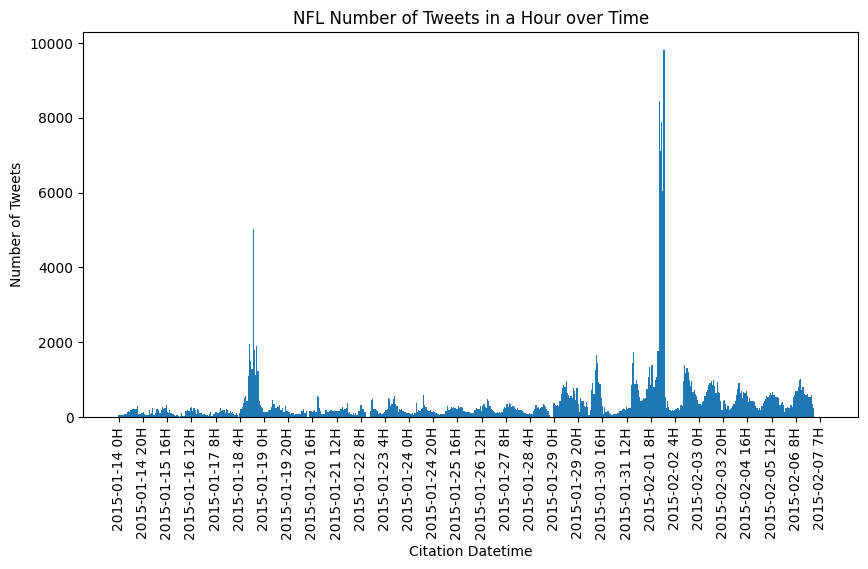

In [8]:
tweets_per_hour_plot(dataset_dict[f"{rootdir}/tweets_#nfl.txt"], title_prefix="NFL")

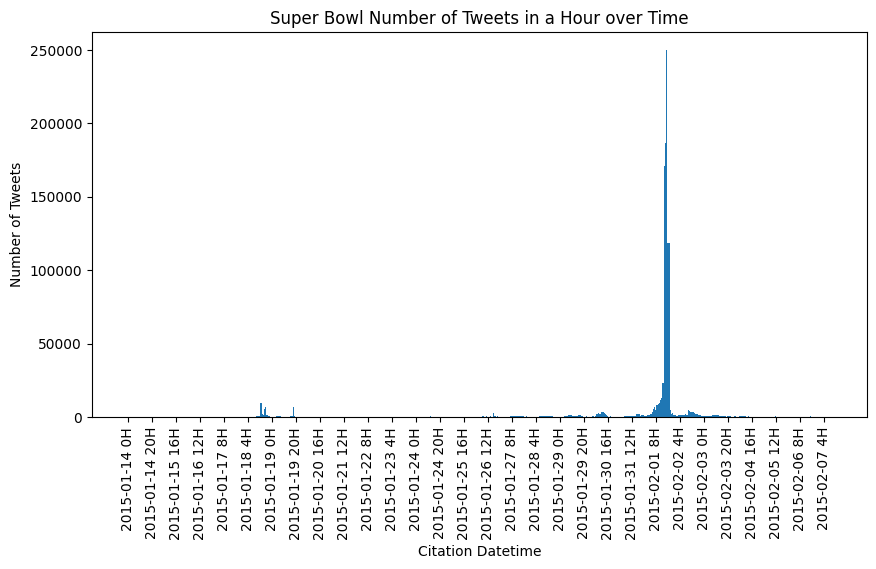

In [9]:
tweets_per_hour_plot(dataset_dict[f"{rootdir}/tweets_#superbowl.txt"], title_prefix="Super Bowl")